**Hands-on Activity 6.1: Neural Networks**

Name: Ignacio, Edrie<br>
Course and Section: CPE019 - CPE32S1<br>
Date of Submission: 06/27/2024<br>
Instructor: Engr. Roman M. Richard<br>

#### Objective(s):

This activity aims to demonstrate the concepts of neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use activation function in neural networks
* Demonstrate how to apply feedforward and backpropagation in neural networks


#### Resources:
* Jupyter Notebook


#### Procedure:

Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define and plot an activation function

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [ ]:
## create a sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

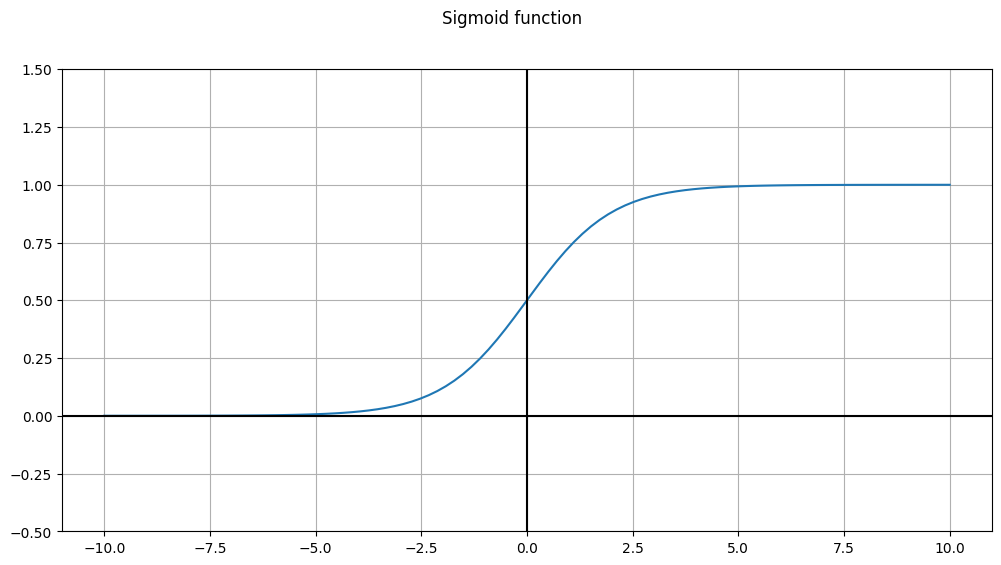

In [ ]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

Choose any activation function and create a method to define that function.

In [ ]:
#type your code here
import numpy as np

# Define ReLU activation function
def relu(x):
    """
    Rectified Linear Unit (ReLU) activation function.

    Parameters:
        x (numpy array): Input array.

    Returns:
        numpy array: Output array after applying ReLU activation.
    """
    return np.maximum(0, x)

# Sample output
input_data = np.array([-1, 0, 1, 2, 3])
output_data = relu(input_data)
print(output_data)


[0 0 1 2 3]


Plot the activation function

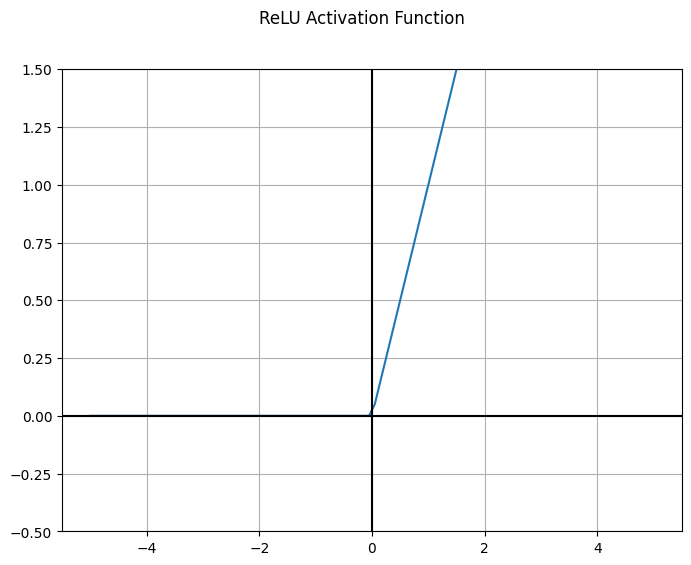

In [ ]:
vals = np.linspace(-5, 5, num=100, dtype=np.float32)
activation = relu(vals)
fig = plt.figure(figsize=(8,6))
fig.suptitle('ReLU Activation Function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

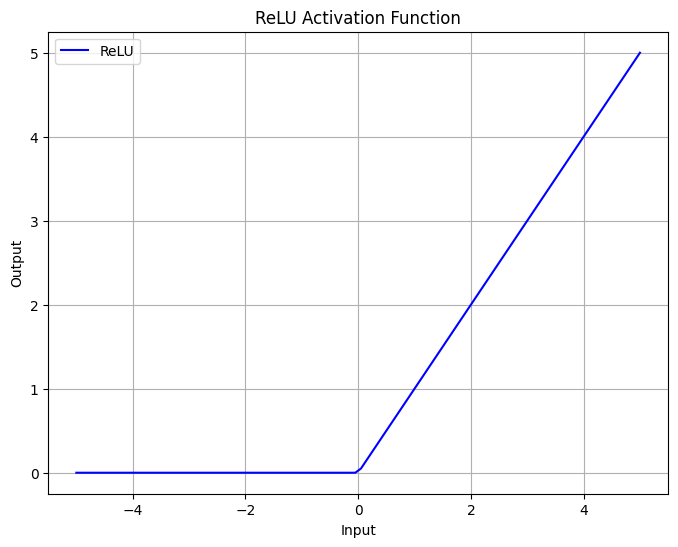

In [ ]:
#type your code here
# Generate input data
x = np.linspace(-5, 5, 100)
y = relu(x)

# Plot ReLU function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ReLU', color='blue')
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()

### Neurons as boolean logic gates



### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values.



By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights , such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be?
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

In [ ]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [ ]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

Try finding the appropriate weight values for each truth table.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>


Try to figure out what values for the neurons would make this function as an AND gate.

In [ ]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 = 10
w2 = 10
b = -15
and_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


Do the same for the NOR gate and the NAND gate.

NOR gate

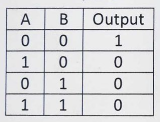

In [ ]:
w1 = -20
w2 = -20
b = 10
nor_gate = logic_gate(w1, w2, b)

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


NAND gate

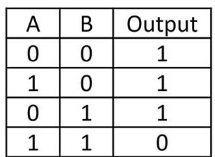

In [ ]:
w1 = -20
w2 = -20
b = 30
nand_gate = logic_gate(w1, w2, b)

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Limitation of single neuron

 Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?


In [ ]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Feedforward Networks

The feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

## Exercise
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards

In [ ]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


## Exercise
1. Get the product of array x_in and W_1 (z2)
2. Apply sigmoid function to z2 that results to a2
3. Get the product of a2 and z2 (z3)
4. Apply sigmoid function to z3 that results to a3
5. Get the product of a3 and z3 that results to z4


In [ ]:
#1 Get the product of array x_in and W_1 (z2)
z2 = np.dot(x_in, W_1)
print('Product of array x_in and W_1\n')

print(z2)

Product of array x_in and W_1

[ 0.8  0.7 -2.1  3.8]


In [ ]:
#2 Apply sigmoid function to z2 that results to a2
a2 = sigmoid(z2)
print(a2)

[0.68997448 0.66818777 0.10909682 0.97811873]


In [ ]:
#3 Get the product of a2 and z2 (z3)
z3 = np.dot(a2, z2)
print('Product of a2 and z2\n')

print(z3)

In [ ]:
#4 Apply sigmoid function to z3 that results to a3
a3 = sigmoid(z3)
print(a3)

0.9890938122523221


In [ ]:
#5 Get the product of a3 and z3 that results to z4
z4 = np.dot(a3, z3)
print('Product of a3 and z3\n')

print(z4)

Product of a3 and z3

4.458299678635824


In [ ]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))


7. Apply soft_max_vec function to z4 that results to y_out

In [ ]:
#type your code here

y_out = soft_max_vec(z4)
print('soft max vec application to z4\n')

print(y_out)

soft max vec application to z4

1.0


In [ ]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [ ]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [ ]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

## Backpropagation
The backpropagation in this part will be used to train a multi-layer perceptron (with a single hidden layer).  Different patterns will be used and the demonstration on how the weights will converge. The different parameters such as learning rate, number of iterations, and number of data points will be demonstrated

In [ ]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?


**Which patterns was the neural network able to learn quickly and which took longer?**

---

The pattern that the Neural Network was abled to learn quickly is the Linearly Separable Patterns which can be seen in this code:


```
# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.array([int(x1 + x2 < 1) for (x1, x2) in X]).reshape(-1, 1)
```

In this code you can observe that the data plots are linear and its classes is separable by a straight line. The straight line that separates the classes lineraly is the part `x1 + x2 = 1`. This only means that there are two sides of classes which in this case is Class 1 and Class 0 with the `x1 + x2 < 1` being Class 1 and `x1 + x2 >= 1` being Class 0.                         

---

**The Neural network that took longer is the Non-Linearly Separable Patterns**


```
# # Generate some random data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.array([int((x1-0.5)**2 + (x2-0.5)**2 < 0.1) for (x1, x2) in X]).reshape(-1, 1)

# Plot the data points
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Data Points')
plt.grid(True)
plt.show()

```
Non-Linearly Separable Patterns can be since in this part of the code. Instead of separating two classes in a straight line, this instead forms a circle that the data points within one class are inside the circle and the ones outside the circle has their own class as well. Since it is shaped and because of its behaviour as a non-linear decision boundary, linear representation is impossible for this type of neural netwwork which makes it a lot longer compared to its counterpart.


In [ ]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### 1 Initialize the weights to random values between -1 and 1
def initialize_weights(input_dim, hidden_dim, output_dim):
    np.random.seed(0)
    W1 = np.random.uniform(-1, 1, (input_dim, hidden_dim))
    W2 = np.random.uniform(-1, 1, (hidden_dim, output_dim))
    return W1, W2

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Forward pass
def forward_pass(X, W1, W2):
    hidden_input = np.dot(X, W1)
    hidden_output = sigmoid(hidden_input)
    output = sigmoid(np.dot(hidden_output, W2))
    return hidden_output, output

### 4 Calculate the gradients for all the weights via-backpropagation
def backward_pass(X, y, hidden_output, output, W2):
    output_error = y - output
    output_delta = output_error * sigmoid_derivative(output)

    hidden_error = output_delta.dot(W2.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    return output_error, output_delta, hidden_delta

### 5 Update the weight matrices (using a learning_rate parameter)
def update_weights(X, hidden_output, output_delta, hidden_delta, W1, W2, lr):
    W2 += hidden_output.T.dot(output_delta) * lr
    W1 += X.T.dot(hidden_delta) * lr
    return W1, W2

# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.array([int(x1 + x2 < 1) for (x1, x2) in X]).reshape(-1, 1)

### 5 Update the weight matrices (using a learning_rate parameter)
input_dim = X.shape[1]
hidden_dim = 4
output_dim = 1
lr = 0.1
num_iterations = 1000

### 1 Initialize the weights to random values between -1 and 1 (Initialize weights)
W1, W2 = initialize_weights(input_dim, hidden_dim, output_dim)

### 3 Compute the loss function (Lists to store accuracies and losses)
accuracies = []
losses = []

### 6 Execute steps 2-5 for a fixed number of iterations (Training loop)
for i in range(num_iterations):
    ###2  Perform the feed-forward computation (Forward Pass)
    hidden_output, output = forward_pass(X, W1, W2)

    # Compute accuracy
    predictions = (output > 0.5).astype(int)
    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)

    ### 3 Compute the loss function
    loss = -np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))
    losses.append(loss)

    ### 4 Calculate the gradients for all the weights via-backpropagation (Backward pass)
    output_error, output_delta, hidden_delta = backward_pass(X, y, hidden_output, output, W2)

    ### 5 Update the weight matrices (using a learning_rate parameter)
    W1, W2 = update_weights(X, hidden_output, output_delta, hidden_delta, W1, W2, lr)

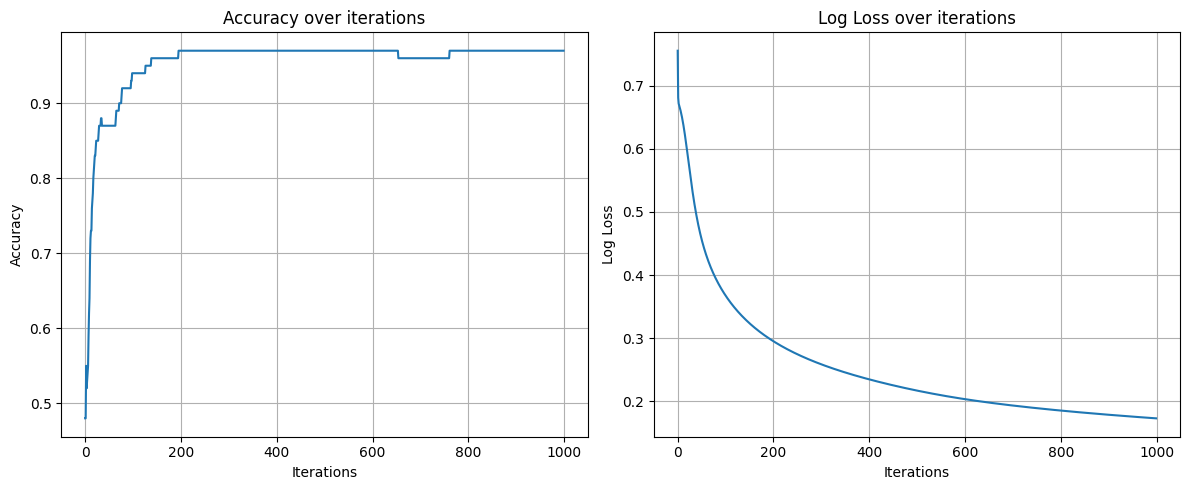

In [ ]:
# Plot accuracies and losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracies)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Log Loss over iterations')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-36-f30e068f8e30>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-36-f30e068f8e30>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


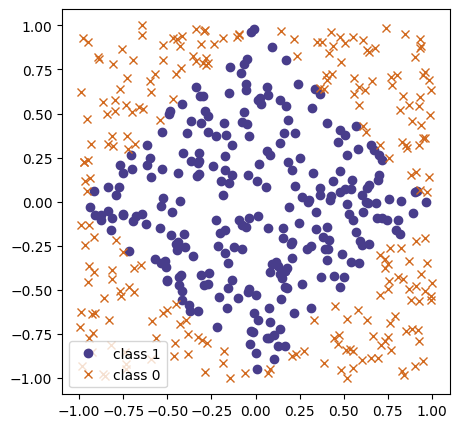

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y= ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [ ]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2, y):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

In [ ]:
def plot(px, py, ax, title, y):
  ax[px, py].plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'o', label='class 1', color='darkslateblue')
  ax[px, py].plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'x', label='class 0', color='chocolate')
  #ax.grid(True)
  ax[px, py].legend(loc='best')
  ax[px, py].axis('equal')
  ax[px, py].set_title(title)

def pattern(patt):
  match patt:
    case 0:
      # # Circle pattern
      y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)
      title = 'Circle Pattern'
      if plotting == True:
        plot(0,0,ax,title, y)
    case 1:
      # # Diamond Pattern
      y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)
      title = 'Diamond Pattern'
      if plotting == True:
        plot(0,1,ax,title,y)
    case 2:
      # # Centered square
      y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)
      title = 'Centered Square'
      if plotting == True:
        plot(1,0,ax,title,y)
    case 3:
      # # Thick Right Angle pattern
      y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)
      title = 'Thick Right Angle Pattern'
      if plotting == True:
        plot(1,1,ax,title,y)
    case 4:
      # # Thin right angle pattern
      y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)
      title = 'Thin Right Angle Pattern'
      if plotting == True:
        plot(2,0,ax,title,y)
  return y

#fig, ax = plt.subplots(3,2, figsize = (10,10))
#plotting = True
#for patt in range(5):
  #pattern(patt)
#fig.delaxes(ax[2][1])
#print('shape of x_mat_full is {}'.format(x_mat_full.shape))
#print('shape of y is {}'.format(y.shape))

Iteration:   0 | Loss: 0.7485899406037987 | Accuracy: 0.568
Iteration: 200 | Loss: 0.680178656525823 | Accuracy: 0.568
Iteration: 400 | Loss: 0.6677541606373704 | Accuracy: 0.568
Iteration: 600 | Loss: 0.6220217772114913 | Accuracy: 0.636
Iteration: 800 | Loss: 0.5513905656013147 | Accuracy: 0.738
Iteration: 1000 | Loss: 0.5063440655022453 | Accuracy: 0.748
Iteration: 1200 | Loss: 0.4269946568556487 | Accuracy: 0.828
Iteration: 1400 | Loss: 0.31602254819950104 | Accuracy: 0.942


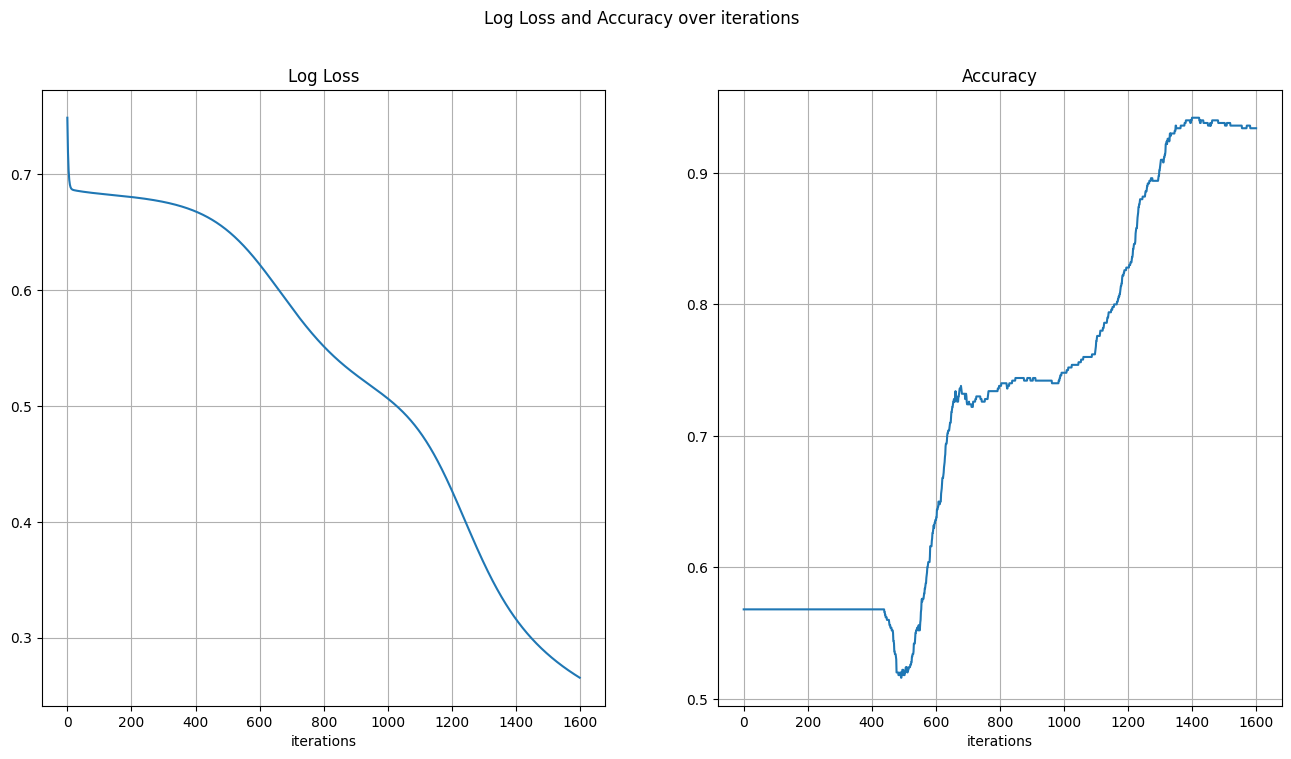

In [ ]:
#### Initialize the network parameters

np.random.seed(1241)

num_obs = 500
W_1 = np.random.uniform(-1,1,size = (3,4))
W_2 = np.random.uniform(-1,1,size = (4))
num_iter = 1600
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
# 0: Circle, 1: Diamond, 2: Centered Square, 3: Thick Right, 4: Thin Right
plotting = False
y = pattern(0)

for i in range(num_iter):
  ## Do a forward computation, and get the gradient
  y_pred, gradient = forward_pass(W_1, W_2, y)

  ## Update the weight matrices
  W_1 = -(gradient[0] * learning_rate) + W_1
  W_2 = -(gradient[1] * learning_rate) + W_2

  ## Compute the loss and accuracy
  loss = loss_fn(y, y_pred)
  accuracy = np.sum((y_pred >= 0.5) == y) / num_obs
  loss_vals.append(loss)
  accuracies.append(accuracy)

  ## Print the loss and accuracy for every 200th iteration
  if (i%200 == 0):
    print(f"Iteration: {i:>3}" + f" | Loss: {loss}" + f" | Accuracy: {accuracy}")

plot_loss_accuracy(loss_vals, accuracies)
#return loss_vals, accuracies

Plot the predicted answers, with mistakes in yellow

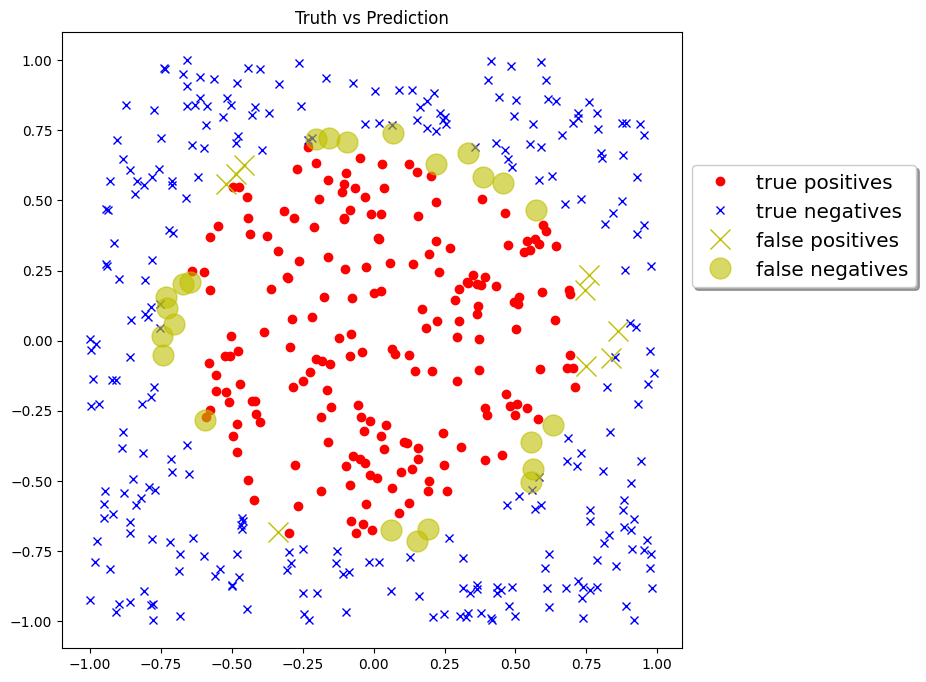

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

#### Supplementary Activity

1. Use a different weights , input and activation function
2. Apply feedforward and backpropagation
3. Plot the loss and accuracy for every 300th iteration


Iteration:   0 | Loss: 0.926728766557111 | Accuracy: 0.296
Iteration: 300 | Loss: 0.48584774092267813 | Accuracy: 0.732
Iteration: 600 | Loss: 0.276711910568506 | Accuracy: 0.94
Iteration: 900 | Loss: 0.15745401951747956 | Accuracy: 0.97
Iteration: 1200 | Loss: 0.11897443595257053 | Accuracy: 0.974
Iteration: 1500 | Loss: 0.10038344966470332 | Accuracy: 0.976
Iteration: 1800 | Loss: 0.08959101578816933 | Accuracy: 0.978
Iteration: 2100 | Loss: 0.08254764170103633 | Accuracy: 0.976
Iteration: 2400 | Loss: 0.07756551013570268 | Accuracy: 0.978
Iteration: 2700 | Loss: 0.07382743726056584 | Accuracy: 0.978
Iteration: 2999 | Loss: 0.07090196958573793 | Accuracy: 0.976


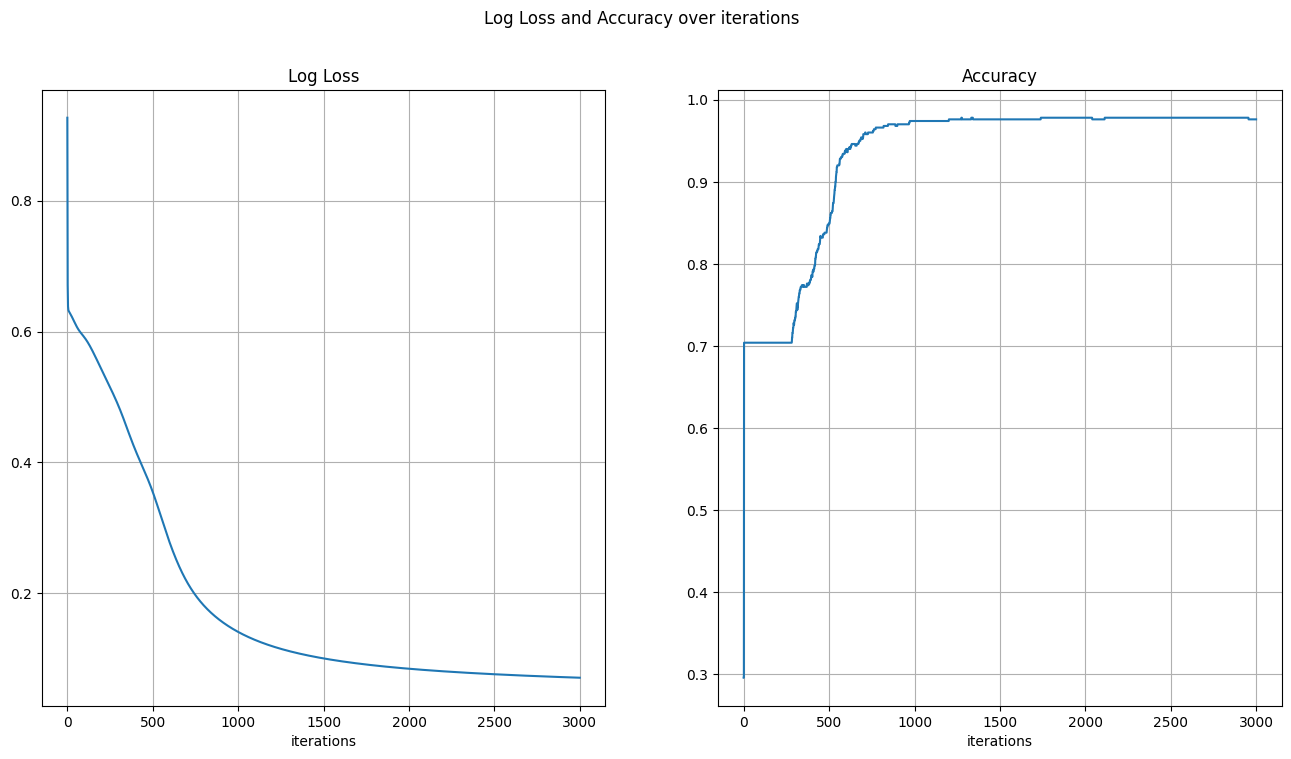

In [ ]:
np.random.seed(9999)
num_obs = 500
W_1 = np.random.uniform(-3,1,size = (3,4))
W_2 = np.random.uniform(-1,3,size = (4))
num_iter = 3000
learning_rate = 0.003
x_mat = x_mat_full


loss_vals, accuracies = [], []
# 0: Circle, 1: Diamond, 2: Centered Square, 3: Thick Right, 4: Thin Right
plotting = False
y = pattern(4)

for i in range(num_iter):
  ## Do a forward computation, and get the gradient
  y_pred, gradient = forward_pass(W_1, W_2, y)

  ## Update the weight matrices
  W_1 = -(gradient[0] * learning_rate) + W_1
  W_2 = -(gradient[1] * learning_rate) + W_2

  ## Compute the loss and accuracy
  loss = loss_fn(y, y_pred)
  accuracy = np.sum((y_pred >= 0.5) == y) / num_obs
  loss_vals.append(loss)
  accuracies.append(accuracy)

  ## Print the loss and accuracy for every 200th iteration
  if (i%300 == 0 or i == num_iter-1):
    print(f"Iteration: {i:>3}" + f" | Loss: {loss}" + f" | Accuracy: {accuracy}")

plot_loss_accuracy(loss_vals, accuracies)
#return loss_vals, accuracies

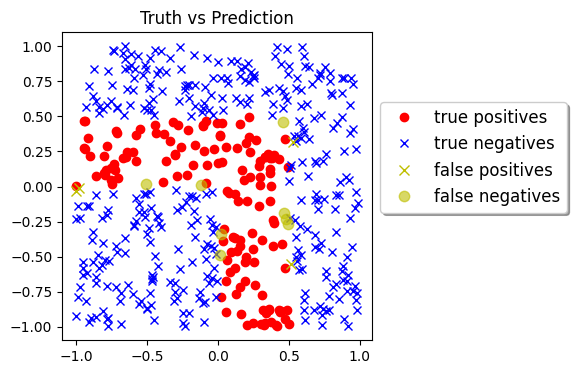

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(4, 4))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=7.5)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=7.5, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='large');

#Conclusion

Thus, this activity helped me learn about Neural Networks with their activation functions. Among several functions it performs, some of the primary ones are feed-forward, backpropagation, Rectified Linear Units, and Sigmoid. All these new things that I have learned from performing this activity are quite hardcore when it comes to their understanding, and fortunately I was able to grasp it. I am really confused regarding what to do with the supplementary activity because it’s really complicated for me to understand in order to do that I searched and get some ideas from the internet and sometimes it is really helpful for me to get some help from my classmates. In sum, I understand what emerging technologies means or refers to for me personally it was very difficult for me whenever you don’t have the flair for it. However, by reviewing this activity, I have identified that I have indeed come across many things in Neural Networks that I hope to come across more of in the future.